In [884]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [1428]:
data = pd.read_csv('Data_Holland/mwl1558_C2.csv')
data.head()

,Pmin,Pmax,Pavg,Pref,Pcmin,Pcavg,Pcmax,Amin,Aavg,Amax,Ramin,Ramax,Ravg,Rain
0,-49,-49,-49.0,-49.00,-49.00,-49.00,-49.00,0.0,0.0,0.0,3.00,3.00,3.00,0
1,-49,-48,-48.5,-48.75,-48.75,-48.75,-48.75,0.0,0.0,0.0,2.75,2.75,2.75,0
2,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0
3,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0
4,-49,-48,-48.5,-48.50,-48.50,-48.50,-48.50,0.0,0.0,0.0,2.50,2.50,2.50,0


In [1429]:
xpts=np.array(data['Ramin'])
ypts=np.array(data['Ravg'])
zpts=np.array(data['Ramax'])
#x1=np.vstack((xpts,ypts,zpts))
x1=np.array(data['Ravg'])
y=np.array(data['Rain'])
x1=x1.T

In [1430]:
num_one_targets = int(np.sum(y))
zero_targets_counter = 0
indices_to_remove = []
for i in range(y.shape[0]):
    if y[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
x1 = np.delete(x1, indices_to_remove, axis = 0)
y = np.delete(y, indices_to_remove, axis = 0)
x1.shape

(1734,)

In [1431]:
#plt.scatter(data['Ravg'],data['Rain'])
#plt.xlabel('Average rounded attenuation')
#plt.ylabel('Rain')


In [1432]:
x1=sm.add_constant(x1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.21, shuffle=True)

In [1433]:
reg_log=sm.Logit(y_train,X_train)
results_log=reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1+np.exp(b0+x*b1)))
f_sorted=np.sort(f(X_train[:,1],results_log.params[0],results_log.params[1]))
x_sorted=np.sort(np.array(X_train[:,1]))

Optimization terminated successfully.
         Current function value: 0.434081
         Iterations 9


In [1434]:
y.shape

(1734,)

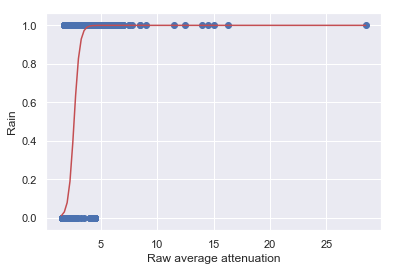

In [1435]:
plt.scatter(X_train[:,1],y_train,color='C0')
plt.xlabel('Raw average attenuation')
plt.ylabel('Rain')
plt.plot(x_sorted,f_sorted,color='C3')
#plt.savefig('logit1687.eps')
#plt.show()

In [1436]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1369
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Feb 2021   Pseudo R-squ.:                  0.3738
Time:                        15:31:56   Log-Likelihood:                -594.26
converged:                       True   LL-Null:                       -948.92
                                        LLR p-value:                2.809e-156
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.5122      0.677    -15.528      0.000     -11.839      -9.185
x1             4.0245      0.262     15.374      0.000       3.511       4.538
==============================================================================
"""

In [1437]:
results_log.pred_table()

array([[663.,  21.],
       [ 86., 599.]])

In [1438]:
test_data = pd.read_csv('Data_Holland/mwl1558_C2.csv')
test_d=test_data[['Ramin','Ravg','Ramax']]
test_actual=test_data['Rain']
test_d=sm.add_constant(test_d)
test_d.head()

C:\Users\Evrad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Ramin,Ravg,Ramax
0,1.0,3.00,3.00,3.00
1,1.0,2.75,2.75,2.75
2,1.0,2.50,2.50,2.50
3,1.0,2.50,2.50,2.50
4,1.0,2.50,2.50,2.50


In [1439]:
def confusion_matrix(data,actual_values,model):
    pred_values=model.predict(data)
    bins=np.array([0,0.5,1])
    cm=np.histogram2d(actual_values,pred_values, bins=bins)[0]
    accuracy=(cm[0,0]+cm[1,1])/cm.sum()
    return cm,accuracy

In [1441]:
cm=confusion_matrix(X_test,y_test,results_log)
cm

(array([[179.,   4.],
        [ 29., 153.]]), 0.9095890410958904)

In [1442]:
y_scores=results_log.predict(X_test)

In [1443]:
results_log.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.374      
Dependent Variable: y                AIC:              1192.5138  
Date:               2021-02-08 15:32 BIC:              1202.9575  
No. Observations:   1369             Log-Likelihood:   -594.26    
Df Model:           1                LL-Null:          -948.92    
Df Residuals:       1367             LLR p-value:      2.8087e-156
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
--------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025     0.975]
--------------------------------------------------------------------
const   -10.5122     0.6770   -15.5284   0.0000   -11.8391   -9.1854
x1        4.0245     0.2618    15.3742   0.0000     3.5114    4.5375
==================================================================

"""

In [1444]:
from sklearn.metrics import log_loss  
# where y_pred are probabilities and y_true are binary class labels
log_loss(y_test, y_scores, eps=1e-15)

0.4108305243599878

In [1445]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_scores))

0.9309283612562301


In [1446]:
y_scores=np.round(y_scores)
y_scores=y_scores.astype(np.int64)

In [1447]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_scores))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       183
           1       0.97      0.84      0.90       182

   micro avg       0.91      0.91      0.91       365
   macro avg       0.92      0.91      0.91       365
weighted avg       0.92      0.91      0.91       365

